In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


In [2]:
data = pd.read_csv('../Processes/Suma/Suma_todasLasSesiones.csv')
a_r = pd.read_csv('aprobados_reprobados.csv')
resultado = pd.merge(left=data, right=a_r, left_on='Id', right_on='ID',how ='left')

In [3]:
data.shape

(443, 12)

In [4]:
train = data.head(440)
test = data.tail(3)

In [5]:
data.columns

Index(['Sesion', 'Id', 'Study', 'Deeds', 'Texteditor', 'Diagram', 'Properties',
       'Other', 'Blank', 'Aulaweb', 'Fsm', 'Nota'],
      dtype='object')

In [6]:
X=train[['Study', 'Deeds', 'Texteditor', 'Diagram', 'Properties',
       'Other', 'Blank', 'Aulaweb', 'Fsm']].to_numpy() #Nota

In [7]:
X

array([[  1.,   1.,   3., ...,  39.,   6.,   0.],
       [  1.,  72.,  10., ...,  47.,  18.,   0.],
       [  1.,   2., 103., ...,  95.,  21.,   0.],
       ...,
       [  2.,   1.,   2., ...,  72., 139.,   0.],
       [  1.,   1.,   5., ...,  94., 225.,   1.],
       [  1.,   2.,  10., ...,  24.,   0.,   2.]])

In [8]:
X.shape

(440, 9)

### Normalizan los datos

In [10]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [11]:
X_std

array([[-0.3952976 , -0.24454161, -0.38004323, ..., -0.58823427,
        -0.58986169, -0.12210111],
       [-0.3952976 ,  0.95720135, -0.30541568, ..., -0.55993793,
        -0.54610316, -0.12210111],
       [-0.3952976 , -0.22761566,  0.68606465, ..., -0.39015989,
        -0.53516353, -0.12210111],
       ...,
       [-0.35935403, -0.24454161, -0.39070431, ..., -0.47151187,
        -0.1048713 , -0.12210111],
       [-0.3952976 , -0.24454161, -0.35872107, ..., -0.39369694,
         0.20873151, -0.01838588],
       [-0.3952976 , -0.22761566, -0.30541568, ..., -0.64128991,
        -0.61174096,  0.08532935]])

### Cluster

In [12]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pylab as plt


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
def cluster_ac(x, n_clusters, link, aff):
    ac = AgglomerativeClustering(n_clusters=n_clusters, affinity=aff, linkage=link)
    #Se realiza el entrenamientio
    ac.fit(x)
    return ac.labels_

In [14]:
def graficarCS(train, link, metodo='calinski_harabasz'):
    aff=['euclidean','cosine','l1','l2']
    for a in aff:
        print('Con link= %s y affinity= %s '%(link,a))
        cluster = AgglomerativeClustering(affinity=a, linkage=link)
        visualizer = KElbowVisualizer(cluster, k=(2,10), metric=metodo, timings=False)
        visualizer.fit(train)        # Fit the data to the visualizer
        visualizer.show()  

Con link= ward y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


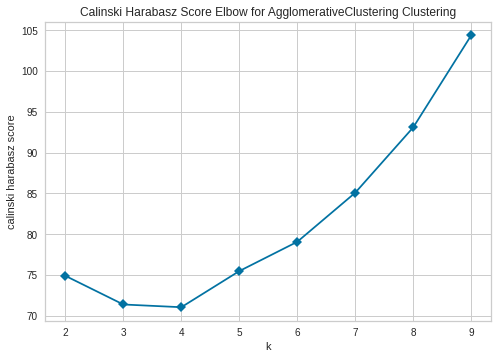

Con link= ward y affinity= cosine 


ValueError: cosine was provided as affinity. Ward can only work with euclidean distances.

In [15]:
graficarCS(X_std,'ward')

Con link= ward y affinity= euclidean 


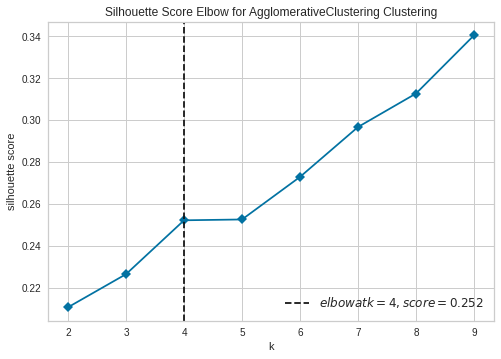

Con link= ward y affinity= cosine 


ValueError: cosine was provided as affinity. Ward can only work with euclidean distances.

In [16]:
graficarCS(X_std,'ward','silhouette')

Con link= single y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


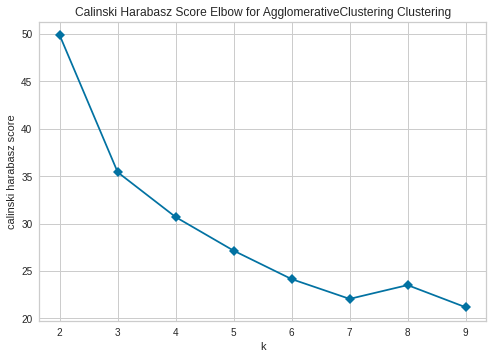

Con link= single y affinity= cosine 


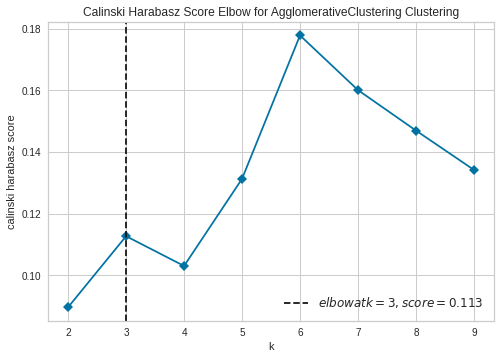

Con link= single y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


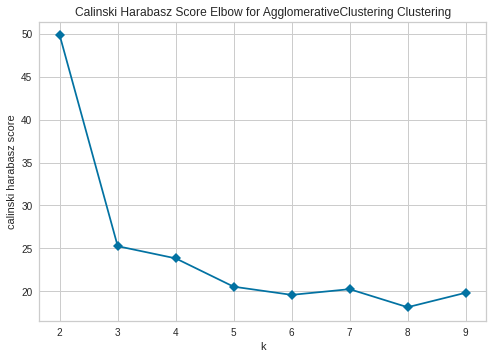

Con link= single y affinity= l2 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


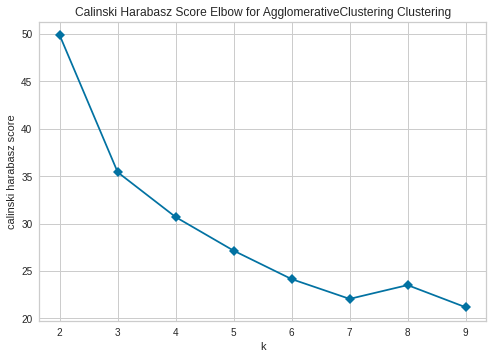

In [20]:
graficarCS(X_std,'single')

Con link= single y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


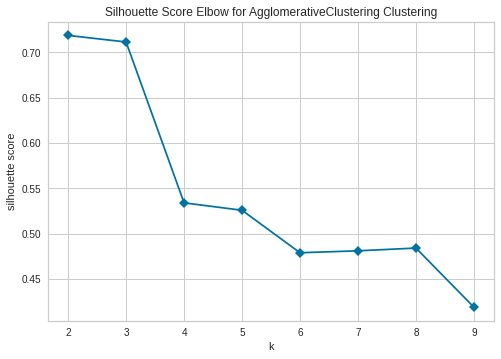

Con link= single y affinity= cosine 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


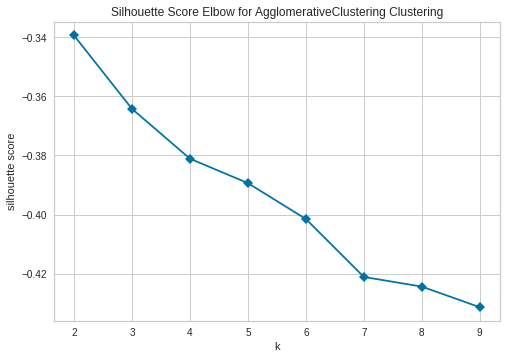

Con link= single y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


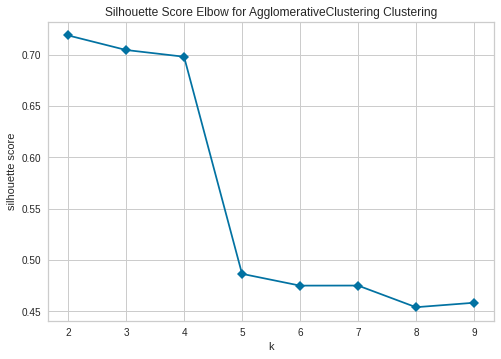

Con link= single y affinity= l2 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


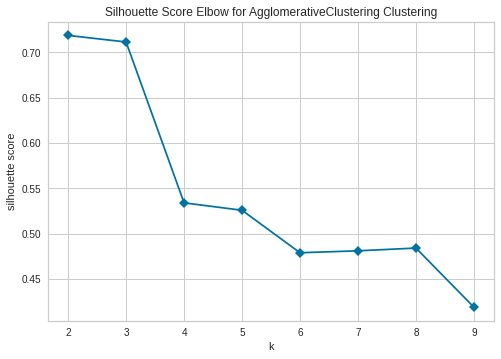

In [40]:
graficarCS(X_std,'single','silhouette')

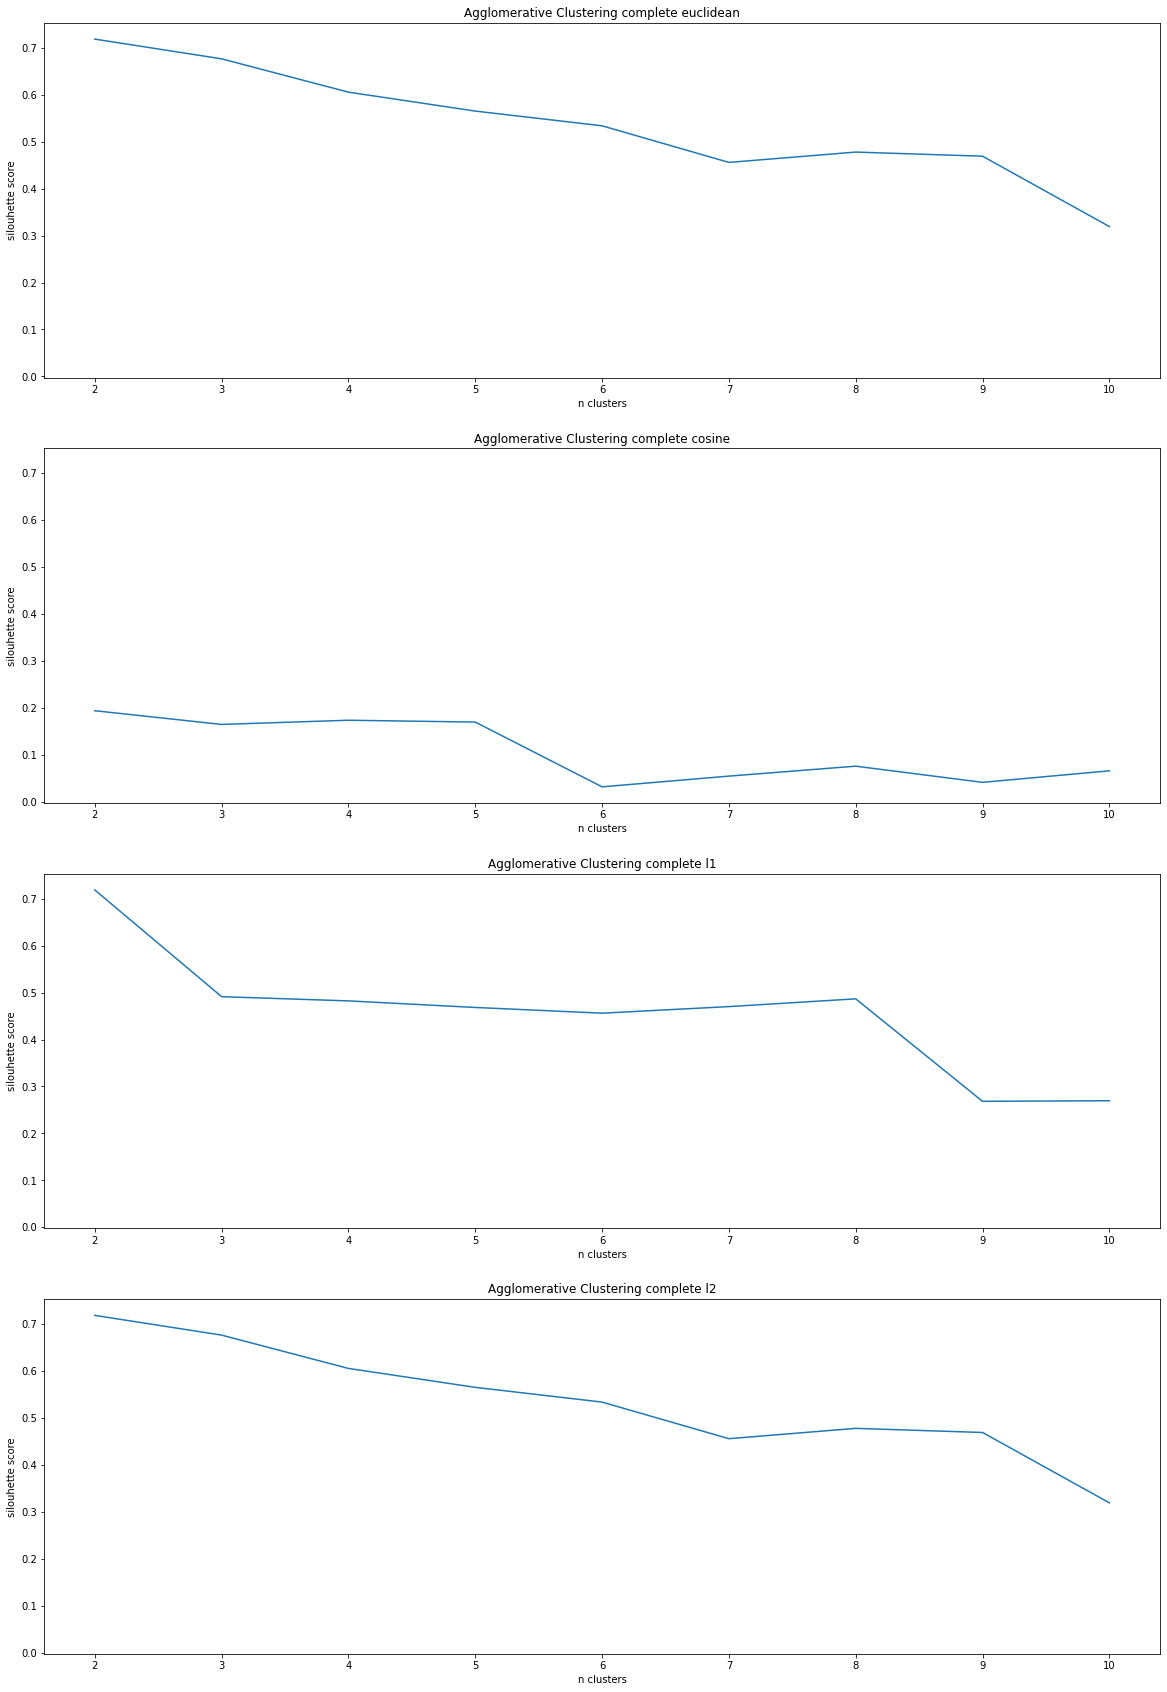

In [16]:
graficarCS(X_std,'complete')

Con link= complete y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


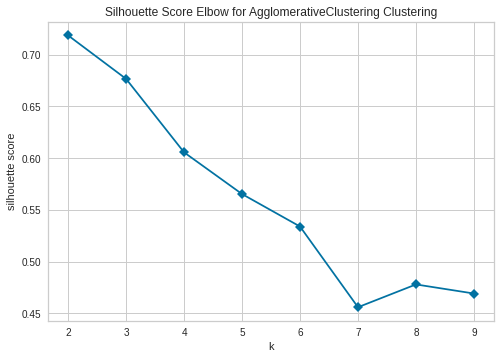

Con link= complete y affinity= cosine 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


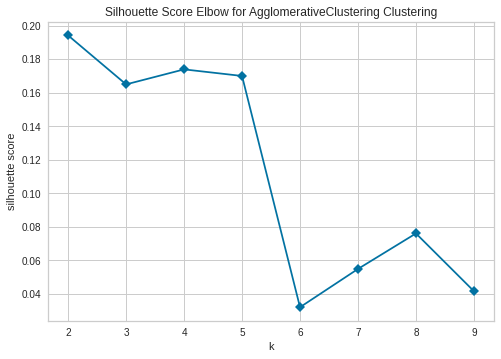

Con link= complete y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


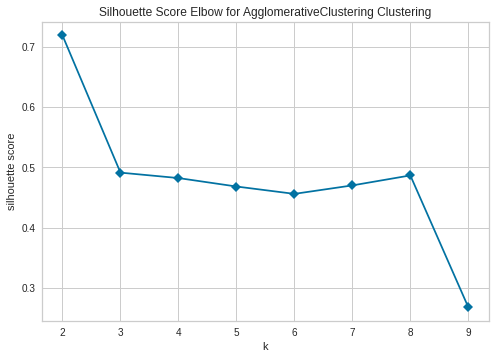

Con link= complete y affinity= l2 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


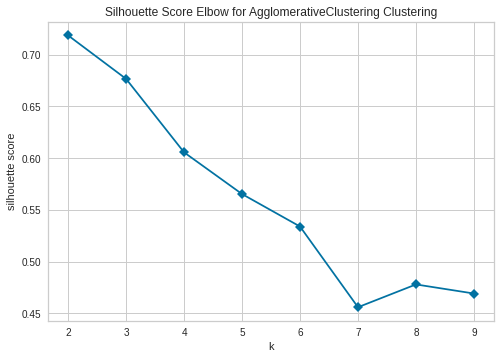

In [19]:
graficarCS(X_std,'complete','silhouette')

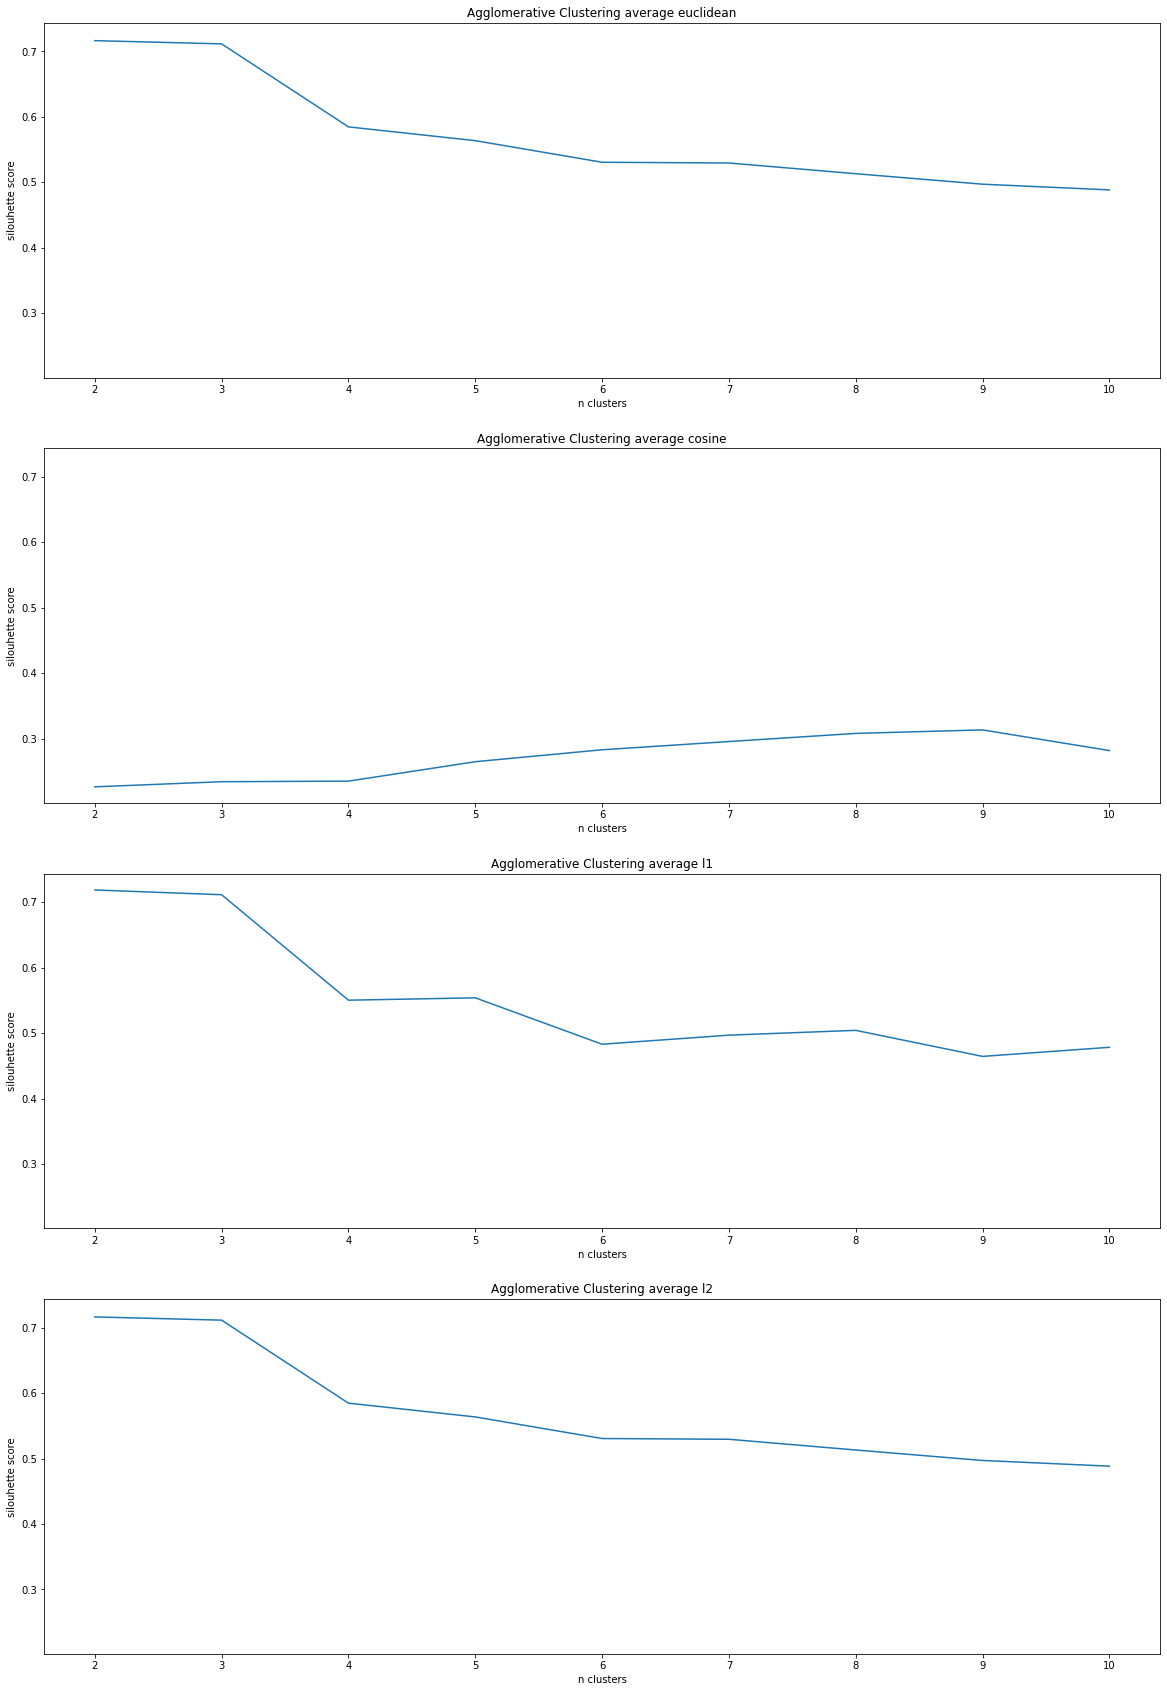

In [17]:
graficar(X_std,'average')

Con link= average y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


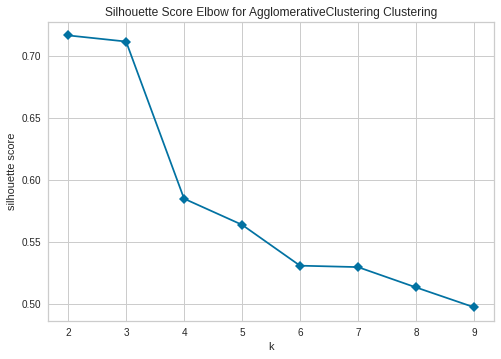

Con link= average y affinity= cosine 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


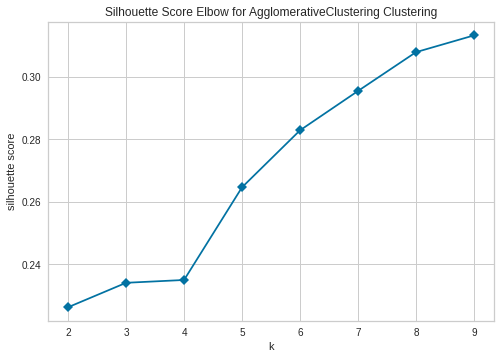

Con link= average y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


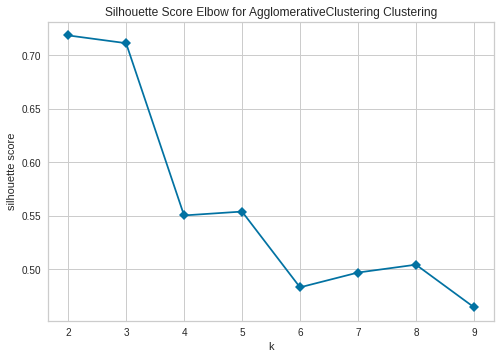

Con link= average y affinity= l2 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


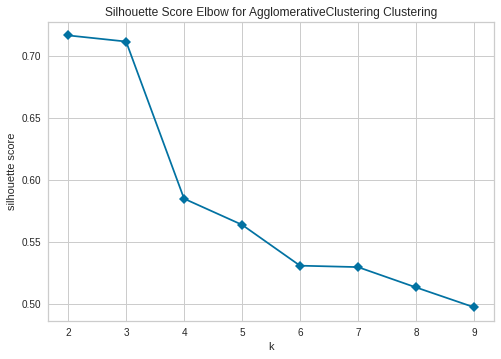

In [21]:
graficarCS(X_std,'average','silhouette')

## Clustering

In [ ]:
# ward 4
# single ecludian 3
# single cosine 3
# AVERAGE ECLUDIAN 3
# average l2 3

In [30]:
## mejores opciones obtenidas de acuerdo al silouhette score
ward = cluster_ac(X_std, 4, 'ward', 'euclidean')
singleE = cluster_ac(X_std, 3, 'single', 'euclidean')
singlel1 = cluster_ac(X_std, 3, 'single', 'cosine')
#singlel1 = cluster_ac(X_std, 5, 'single', 'l1')
# completel1 = cluster_ac(X_std, 9, 'complete', 'l1')
# completeC = cluster_ac(X_std, 6, 'complete', 'cosine')
averageE = cluster_ac(X_std, 3, 'average', 'euclidean')
#averageC = cluster_ac(X_std, 7, 'average', 'cosine')
averagel2 = cluster_ac(X_std, 3, 'average', 'l2')
#averagel1 = cluster_ac(X_std, 4, 'average', 'l1')

## Reducir las dimensiones para visualizar

In [31]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [32]:
def reducir_dim_tsne(x, ndim):
    pca = TSNE(n_components=ndim)
    return pca.fit_transform(x)


In [33]:
results = pd.DataFrame(np.column_stack([reducir_dim_tsne(X_std,2),ward,singleE,singlel1,
                                        averageE,averagel2]), 
                      columns=["x", "y", 'AGWE',"AGSE", "AGSl1",'AGAE','AGAl2'])

## Mostrar los resultados

In [34]:
import seaborn as sns

In [35]:
def mostrar_resultados(res):
    """Muestra los resultados de los algoritmos
    """
    fig, ax = plt.subplots(5,1 , figsize=(20, 100))
    sns.scatterplot(data=res, x="x", y="y", hue="AGSE", ax=ax[0], legend="full")
    ax[0].set_title('AGSE')
    sns.scatterplot(data=res, x="x", y="y", hue="AGSl1", ax=ax[1], legend="full")
    ax[1].set_title('AGSl1')
#     sns.scatterplot(data=res, x="x", y="y", hue="AGCl1", ax=ax[2], legend="full")
#     ax[2].set_title('AGCl1')
#     sns.scatterplot(data=res, x="x", y="y", hue="AGCC", ax=ax[3], legend="full")
#     ax[3].set_title('AGCC')
    sns.scatterplot(data=res, x="x", y="y", hue="AGAE", ax=ax[2], legend="full")
    ax[2].set_title('AGAE')
    sns.scatterplot(data=res, x="x", y="y", hue="AGAl2", ax=ax[3], legend="full")
    ax[3].set_title('AGAl2')
    sns.scatterplot(data=res, x="x", y="y", hue="AGWE", ax=ax[4], legend="full")
    ax[4].set_title('AGWS')

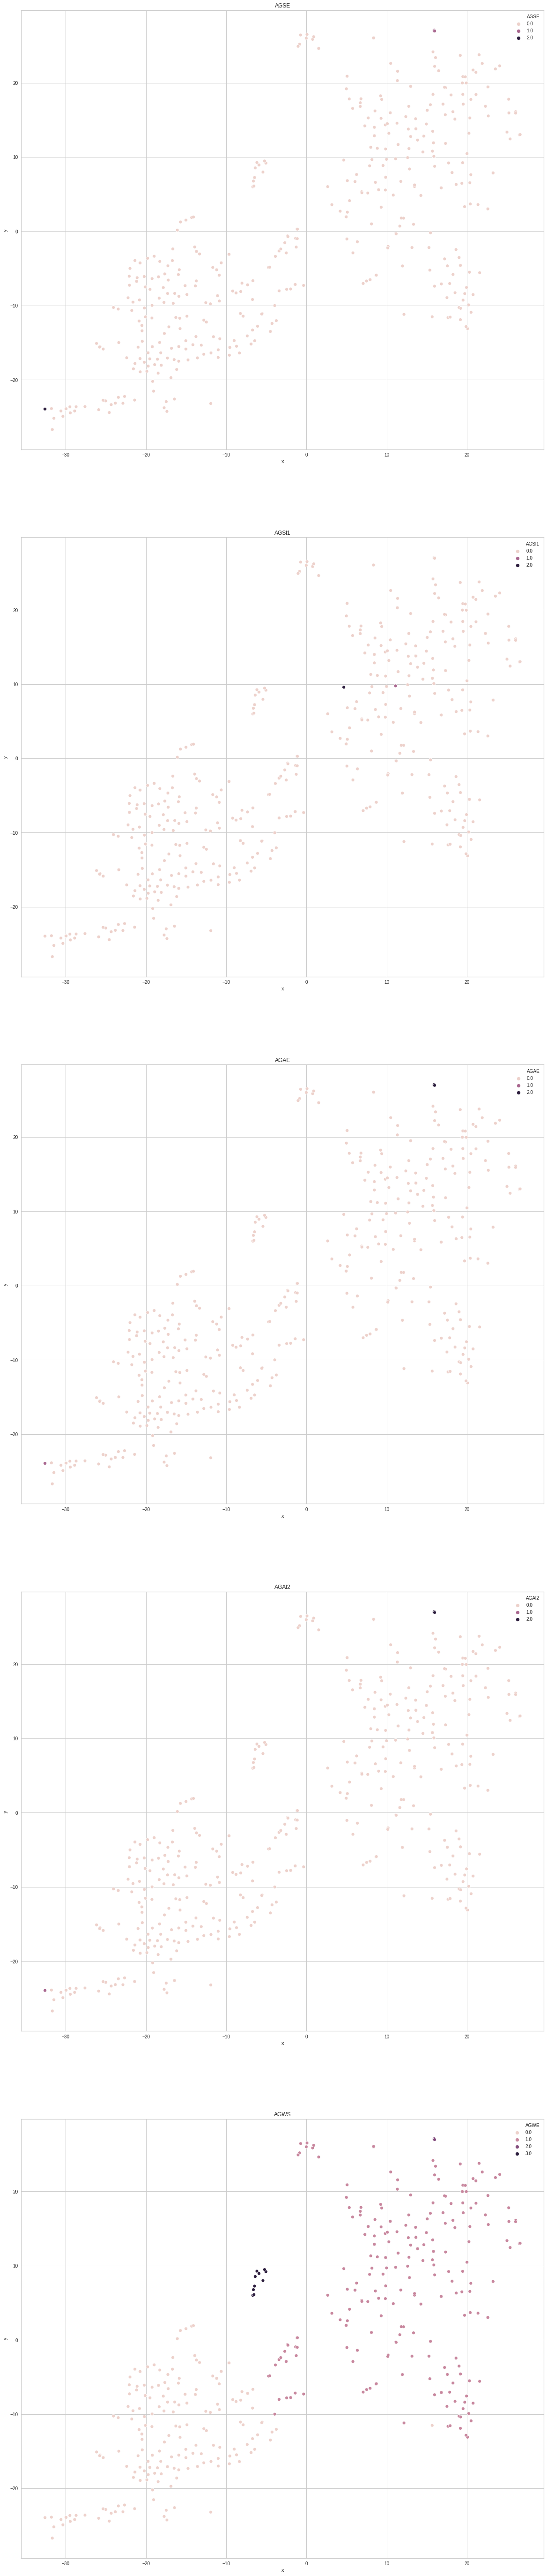

In [36]:
mostrar_resultados(results)

### Obtiene el numero de instancias por cada cluster

In [38]:
def getElements(cluster):
    unique, counts = np.unique(cluster, return_counts=True)
    return dict(zip(unique,counts))

In [39]:
getElements(ward)

{0: 171, 1: 256, 2: 3, 3: 10}

In [27]:
getElements(completeC)

{0: 134, 1: 40, 2: 68, 3: 130, 4: 41, 5: 27}

In [28]:
#getElements(averageC)

In [29]:
aprobado = resultado[['aprobar']].head(440)

In [30]:
columnas = ['Study', 'Deeds', 'Texteditor', 'Diagram', 'Properties',
       'Other', 'Blank', 'Aulaweb', 'Fsm']+['cluster']+list(aprobado.columns)

In [31]:
union1 = pd.DataFrame(np.column_stack([X_std,completel1,aprobado]),columns=columnas)

In [32]:
union2 = pd.DataFrame(np.column_stack([X_std,completeC,aprobado]),columns=columnas)

In [33]:
for i in range(9):
    print('Cluster: ',i,'  ',getElements(union1[(union1['cluster']==i)].aprobar))

Cluster:  0    {0.0: 6, 1.0: 2}
Cluster:  1    {0.0: 143, 1.0: 142}
Cluster:  2    {0.0: 6, 1.0: 6}
Cluster:  3    {0.0: 38, 1.0: 65}
Cluster:  4    {0.0: 10}
Cluster:  5    {0.0: 6}
Cluster:  6    {0.0: 3, 1.0: 3}
Cluster:  7    {0.0: 1, 1.0: 2}
Cluster:  8    {0.0: 4, 1.0: 3}


In [34]:
for i in range(6):
    print('Cluster: ',i,'  ',getElements(union2[(union2['cluster']==i)].aprobar))

Cluster:  0    {0.0: 71, 1.0: 63}
Cluster:  1    {0.0: 21, 1.0: 19}
Cluster:  2    {0.0: 36, 1.0: 32}
Cluster:  3    {0.0: 59, 1.0: 71}
Cluster:  4    {0.0: 17, 1.0: 24}
Cluster:  5    {0.0: 13, 1.0: 14}


In [35]:
union1[union1['cluster']==0]

,Study,Deeds,Texteditor,Diagram,Properties,Other,Blank,Aulaweb,Fsm,cluster,aprobar
7,8.842200,-0.109134,-0.390704,-1.095193,-0.859500,-0.865373,-0.429067,-0.462233,-0.122101,0.0,0.0
26,7.080965,0.330941,0.366232,-1.231105,-0.916886,-0.744492,0.352619,-0.382009,-0.122101,0.0,0.0
57,4.780577,-0.227616,0.824659,-1.093535,-0.864282,-0.574769,-0.627142,0.256137,-0.122101,0.0,0.0
64,3.091229,0.009348,-0.369382,-1.107624,-0.931232,-0.751818,-0.489197,-0.338250,-0.122101,0.0,1.0
73,3.342834,-0.244542,-0.401365,-1.106795,-0.806896,-0.704198,-0.542253,-0.236147,-0.122101,0.0,0.0
308,4.780577,-0.244542,-0.390704,0.410609,0.374304,5.052951,0.009526,0.824998,0.292760,0.0,0.0
394,4.780577,-0.244542,-0.390704,0.410609,0.374304,5.059057,0.009526,0.824998,0.292760,0.0,0.0
395,4.133592,-0.227616,1.251102,0.382432,-0.280855,0.718301,0.218211,-0.097578,-0.122101,0.0,1.0


In [36]:
union1.groupby('cluster').mean()

,Study,Deeds,Texteditor,Diagram,Properties,Other,Blank,Aulaweb,Fsm,aprobar
cluster,,,,,,,,,,
0.0,5.104069,-0.119713,0.062392,-0.553825,-0.488880,0.898707,-0.187222,0.048739,-0.018386,0.250000
1.0,-0.271324,-0.159971,-0.291351,-0.353869,-0.334231,-0.073256,-0.221424,-0.137665,-0.116642,0.498246
2.0,-0.359354,5.146376,0.274725,-0.679861,-0.392838,-0.503644,-0.338578,-0.036195,-0.122101,0.500000
3.0,0.454785,-0.101575,0.269041,0.983278,0.572462,0.108177,0.232222,0.048531,0.027934,0.631068
4.0,-0.197608,-0.234386,-0.125243,-0.059198,1.293439,-0.326411,4.833698,-0.395501,-0.122101,0.000000
5.0,-0.311429,-0.241721,0.744701,0.996521,4.388946,2.256796,-0.486250,-0.242224,-0.122101,0.000000
6.0,-0.281476,-0.213511,0.780238,0.456880,0.451616,0.347515,-0.363632,6.763395,0.068043,0.500000
7.0,-0.023881,0.235027,0.216977,1.350113,0.312135,0.005220,0.768811,0.146740,11.459433,0.666667
8.0,-0.061536,-0.053520,6.139968,-0.002098,0.286175,-0.541103,-0.113765,-0.190305,-0.122101,0.428571


In [37]:
union2.groupby('cluster').mean()

,Study,Deeds,Texteditor,Diagram,Properties,Other,Blank,Aulaweb,Fsm,aprobar
cluster,,,,,,,,,,
0.0,-0.187147,-0.150817,0.556461,0.905151,0.924861,0.068212,0.040647,-0.059861,0.253286,0.470149
1.0,-0.130214,-0.228885,-0.370448,-0.259212,-0.342546,-0.232362,1.566001,-0.280270,-0.119508,0.475000
2.0,-0.046962,0.897712,0.047341,-0.095391,-0.090201,1.131834,0.109655,1.099829,-0.085496,0.470588
3.0,-0.346359,-0.149235,-0.339449,-0.946844,-0.860530,-0.437037,-0.424850,-0.306469,-0.120505,0.546154
4.0,2.137409,-0.181792,-0.266412,0.199404,0.080608,-0.295719,-0.220468,-0.228676,-0.117042,0.585366
5.0,-0.338054,-0.178718,-0.293175,0.388111,0.165482,-0.291535,-0.417539,-0.234796,-0.106736,0.518519
